## Temporary, copiato da data_exploration_IPF per averne due diversi, però da fare un data exploration fatto a modo, magari uno solo,
che  mostri: come le altre correlation measures siano poco informative e poco potenti rispetto a cs, tutti con mithril data
come il FC based cs sia peggio di mith based perche abbia troppe curve significative (fc based cs data for ipf da fare), e come non ci siano drugs in comune fra i due. e, al FINALE, non prima come è adesso, mettere il filtro di pvalue e cs per prendere le migliori

In [2]:
from scipy import stats

import os
if not os.getcwd().endswith('modules'):
    os.chdir('../modules')
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from preprocessing_utils import get_drugs_list
from conf import DISEASE, MITH_IN_DRUG, MITH_OUT_DRUG, CS_OUT, \
 TSR_OUT_DRUG,TSR_OUT_DISEASE, TSR_OUT_CSCORE,IMG_DIR, alias_2geneid
from loader import load_disease_signature, load_single_drug_signature, load_drug_signatures
from plot_drugs_signatures_correlations import compare_deg_and_mith_genes,  prop_agreeing_signs, print_correlations, plot_correlation, plot_10_most_correlated
print(DISEASE)

def plot_hist(DEG_cs_data=False, mith_cs_data=False, colname='connectivity_score', pert_times=['6h','24h','6h_24h']):
 
    for pert_time in pert_times:
        if not type(DEG_cs_data)==bool:
            plt.hist(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time][colname], label='DEG', alpha=0.8, bins=100)
            print(DEG_cs_data[DEG_cs_data.perturbation_time==pert_time].shape)
        if not type(mith_cs_data)==bool:
            print(mith_cs_data[mith_cs_data.perturbation_time==pert_time].shape)
            plt.hist(mith_cs_data[mith_cs_data.perturbation_time==pert_time][colname], label='mith', alpha=0.5, bins=100)
        
        plt.grid(linestyle='--')
        plt.xlim(-2,2)
        plt.title(pert_time)
        plt.legend()
        plt.show()

als_NYGC


# <div align="center"><b>Data exploration: comparison between FC and MITHrIL data</b>

## filtered DEG data:


In [2]:
DEG_signature_disease=load_disease_signature(DISEASE)
DEG_signature_disease

,gene,DE_log2_FC,std.error,t.value,p.value,adj.p.value,gene_id
0,A1BG,0.394082,0.155932,2.527274,0.015539,0.033684,1
1,A1BG-AS1,-0.053794,0.196272,-0.274081,0.785429,0.836482,503538
2,A2M-AS1,0.158941,0.183335,0.866943,0.391130,0.485167,144571
3,A4GALT,0.846013,0.155536,5.439343,0.000003,0.000024,53947
4,AAAS,-0.121765,0.098836,-1.231993,0.225126,0.309680,8086
...,...,...,...,...,...,...,...
14868,ZXDC,-0.249938,0.058799,-4.250716,0.000124,0.000579,79364
14869,ZYG11B,-0.057815,0.085105,-0.679332,0.500829,0.591056,79699
14870,ZYX,0.264760,0.138895,1.906194,0.063808,0.109409,7791
14871,ZZEF1,0.018773,0.086757,0.216382,0.829787,0.872128,23140


## Mith 3 data
disease (als_NYGC) 

In [17]:
filename=DISEASE+'_mith3_signature.csv'
mith_signature_disease=load_disease_signature(DISEASE, mith=True)
mith_signature_disease

,gene_id,gene,Perturbation,p.value,adj.p.value
0,6197,RPS6KA3,0.190416,0.641179,0.680376
1,chebi:456216,ADP(3-),154.036681,0.033483,0.451160
2,6196,RPS6KA2,0.142288,0.659670,0.696128
3,chebi:30616,ATP(4-),32.574337,0.044978,0.462561
4,5594,MAPK1,0.852604,0.765617,0.788118
...,...,...,...,...,...
14842,9247,GCM2,-0.000002,0.399800,0.526244
14843,4666,NACA,0.087437,0.421789,0.534993
14844,8521,GCM1,-0.000606,0.609695,0.655407
14845,gl:G00711,(GlcA)1 (GlcNAc)2,0.349129,0.041979,0.462561


## Note: 
Genes in mithril3 are actually genes, microRNas AND metabolites.

Always refer to gene id column

do not trust 'gene' column, since it has some duplicates among the metabolytes (but they have different IDs in the gene_id colun):

## Comparison of genes missing from mithril output bur present in DEG (filtered for duplicates and gene id) data:

In [18]:
DEG_disease_common, mith_disease_common=compare_deg_and_mith_genes(DEG_signature_disease, mith_signature_disease)

missing genes from mithril 7069
addional_mith_items 7043
genes in common 7804
riprova: common genes+ additional mithril items == len(mithril_gene)? True
riprova: common genes+ missing mithril items == len(DEG_genees)? True


## Which of these mithril data are metabolytes and miRNAs?

In [19]:
disease_signature_sm  = mith_signature_disease[~mith_signature_disease['gene_id'].isin([str(x) for x in alias_2geneid.values()])]
disease_signature_sm

,gene_id,gene,Perturbation,p.value,adj.p.value
1,chebi:456216,ADP(3-),154.036681,0.033483,0.451160
3,chebi:30616,ATP(4-),32.574337,0.044978,0.462561
15,chebi:43474,hydrogenphosphate,124.495489,0.167416,0.512412
16,cpd:C00001,H2O,41.378807,0.104948,0.492244
26,hsa-miR-199b-3p,hsa-miR-199b-3p,0.003061,0.650175,0.688196
...,...,...,...,...,...
14836,gl:G13150,(GlcN)1 (Ino(acyl)-P)1 (Man)3 (EtN)3 (P)3 (pro...,-0.024557,0.390805,0.526244
14837,gl:G10610,UDP-N-acetyl-D-glucosamine,-0.000003,0.399800,0.526244
14839,gl:G13151,(GlcN)1 (Man)3 (EtN)3 (P)3 (protein)1 (Ino-P)1,-0.405927,0.169915,0.512412
14845,gl:G00711,(GlcA)1 (GlcNAc)2,0.349129,0.041979,0.462561


In [80]:
# histograms with cmmon genes

C:\Users\los4\AppData\Local\Temp\ipykernel_2384\869579602.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()


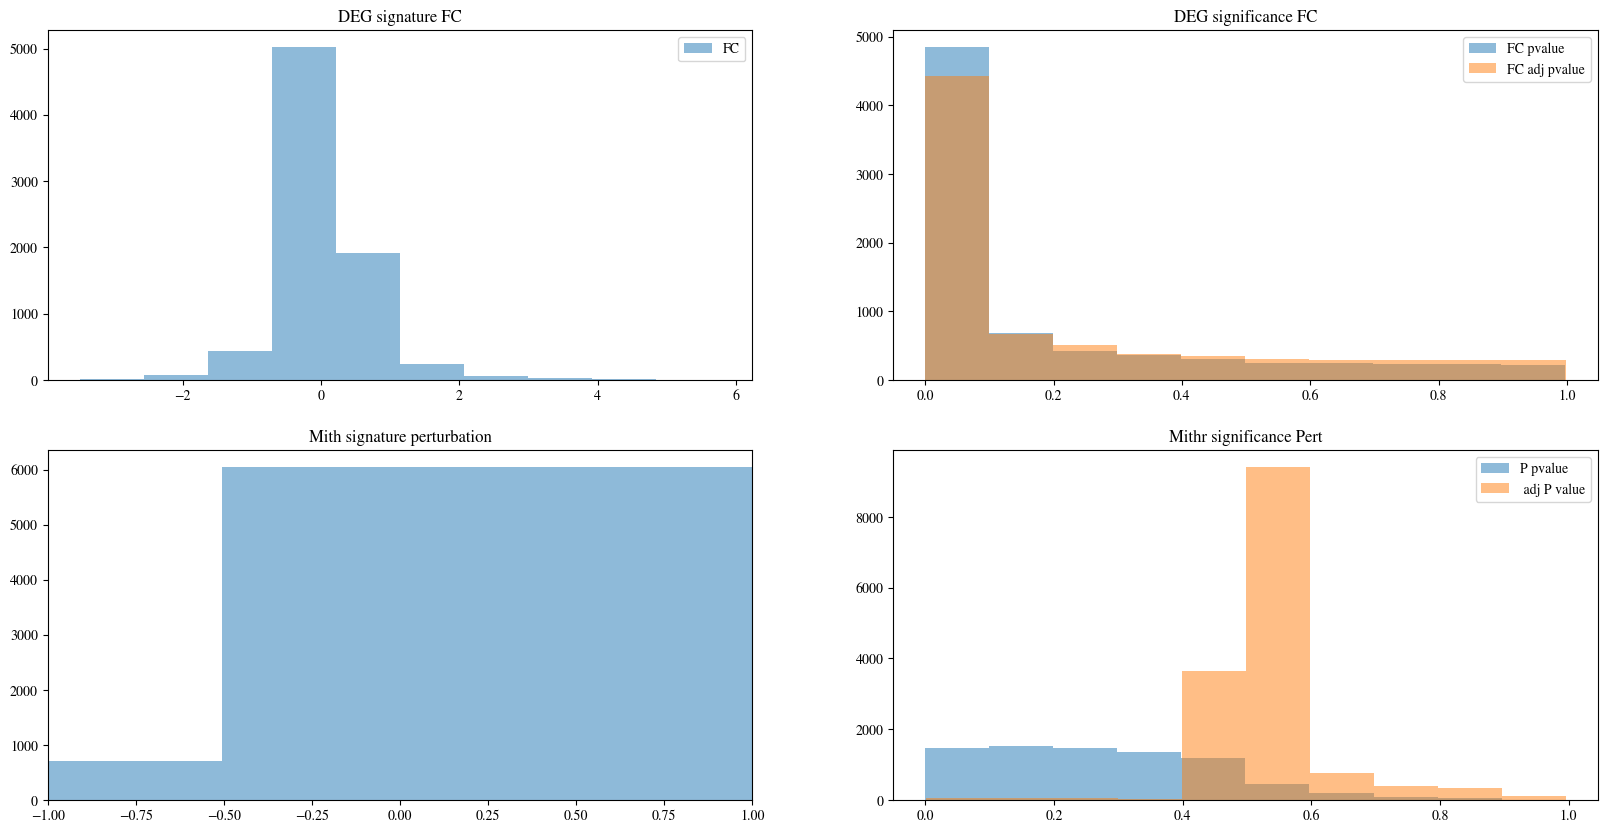

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(DEG_disease_common['DE_log2_FC'], label='FC', alpha=0.5)
ax[1,0].hist(mith_disease_common['Perturbation'], label='P', alpha=0.5)
ax[1,0].set_xlim(-1,1)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(DEG_disease_common['p.value'], label='FC pvalue', alpha=0.5)
ax[0,1].hist(DEG_disease_common['adj.p.value'], label='FC adj pvalue', alpha=0.5)

ax[1,1].hist(mith_disease_common['p.value'], label='P pvalue', alpha=0.5)
ax[1,1].hist(mith_signature_disease['adj.p.value'], label=' adj P value', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[0,1].legend()
ax[1,1].legend()



In [82]:
# controllare metaboliti e mirna significativita e foldchange

FC più spread out, pvalue piu uniformi, Perturbations piu uniformi, pvalue più bimodali. 
However, adjusted pvalues in MITHrIL differ from normal p values, greatly limiting significance

## Correlations between FC and  MITHrIL perturbations
for common genes between tsr data and mithril data

Pearson cc: PearsonRResult(statistic=0.004061446316766349, pvalue=0.7197946932950061) 
Spearman cc: SignificanceResult(statistic=0.01365252110108299, pvalue=0.2278444253345246)


(PearsonRResult(statistic=0.004061446316766349, pvalue=0.7197946932950061),
 SignificanceResult(statistic=0.01365252110108299, pvalue=0.2278444253345246))

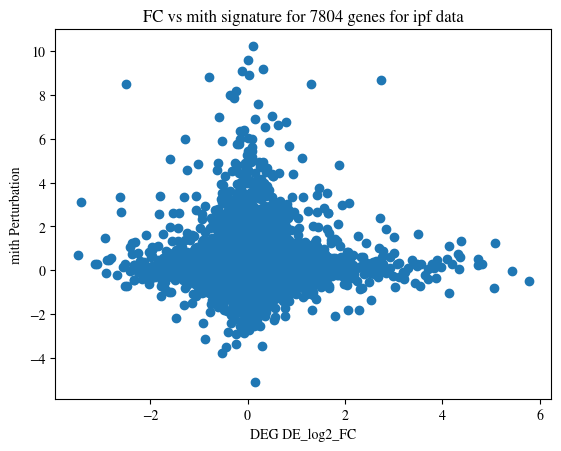

In [29]:
print_correlations(DEG_disease_common,  mith_disease_common,\
                       DEG_col='DE_log2_FC', mith_col='Perturbation',data_name=DISEASE)

Pearson cc: PearsonRResult(statistic=-0.015452261586743503, pvalue=0.17227835532008096) 
Spearman cc: SignificanceResult(statistic=-0.03402660232334457, pvalue=0.0026444136000891884)


(PearsonRResult(statistic=-0.015452261586743503, pvalue=0.17227835532008096),
 SignificanceResult(statistic=-0.03402660232334457, pvalue=0.0026444136000891884))

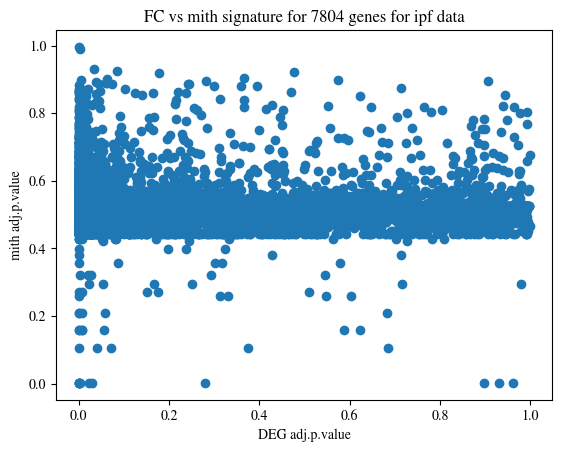

In [32]:
print_correlations(DEG_disease_common,  mith_disease_common,\
                       DEG_col='adj.p.value', mith_col='adj.p.value',data_name=DISEASE)

In [33]:
# tanti dei geni significativi per tsr non lo sono per mithril!

## Is there a correlation between signs?

In [34]:
mith_disease_common['sign']=mith_disease_common.Perturbation.apply(lambda x : np.where(x>0,1,0))
DEG_disease_common['sign']=DEG_disease_common.DE_log2_FC.apply(lambda x : np.where(x>0,1,0))

prop_agreeing_signs(DEG_disease_common, mith_disease_common, sign_col='sign')

C:\Users\los4\AppData\Local\Temp\ipykernel_2384\1758225976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mith_disease_common['sign']=mith_disease_common.Perturbation.apply(lambda x : np.where(x>0,1,0))
C:\Users\los4\AppData\Local\Temp\ipykernel_2384\1758225976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DEG_disease_common['sign']=DEG_disease_common.DE_log2_FC.apply(lambda x : np.where(x>0,1,0))


0.8744233726294208

YES!

## DEG LINCS data


DEG Drug wise ordering of metanalysis files, converted from gene-wise ordering of metanalysis files

In [3]:
drugs_DEG_signatures= load_drug_signatures(mith=False, pkl=False)

loading all drug signatures...
12 drugs loaded


In [20]:
drugs_DEG_signatures.drug.unique()

array(['oligomycin-a', 'ibuprofen', 'RHO-kinase-inhibitor-III[rockout]',
       'amitriptyline', 'hydrastine-(1r,-9s)', 'ibuprofen-(S)',
       'zuclopenthixol', '1,2,3,4,5,6-hexabromocyclohexane',
       "7,4'-dihydroxyflavone", 'pseudoephedrine', 'umbelliferone',
       'morphothebaine', '4-carboxy-3-hydroxyphenylglycine-(RS)'],
      dtype=object)

## Using a single random drug as example:
ex_drug='pseudoephedrine'

In [110]:
ex_drug='ibuprofen'
ex_drug_DEG_signature=load_single_drug_signature(ex_drug)
ex_drug_DEG_signature

,gene,drug,DE_log2_FC_6h,std.error_6h,t.value_6h,p.value_6h,adj.p.value_6h,DE_log2_FC_24h,std.error_24h,t.value_24h,p.value_24h,adj.p.value_24h,DE_log2_FC_6h_24h,std.error_6h_24h,t.value_6h_24h,p.value_6h_24h,gene_id
0,A2M,ibuprofen,-0.139099,0.175280,-0.793584,0.427438,0.773377,0.098812,0.215370,0.458799,0.646379,0.875154,-0.044305,0.135947,-0.325898,0.744501,3494
1,A4GALT,ibuprofen,0.017596,0.045795,0.384221,0.700815,0.961708,0.108390,0.055132,1.966020,0.049296,0.354559,0.057804,0.045100,1.281686,0.199953,53947
2,AAAS,ibuprofen,0.006481,0.047413,0.136694,0.891273,0.967995,-0.038132,0.051690,-0.737698,0.460698,0.752341,-0.013903,0.034940,-0.397918,0.690691,8086
3,AACS,ibuprofen,-0.203467,0.088995,-2.286280,0.022238,0.167407,0.141628,0.104720,1.352441,0.176234,0.527720,-0.035333,0.172491,-0.204841,0.837697,65985
4,AADAC,ibuprofen,0.001028,0.091233,0.011271,0.991007,0.996773,0.081372,0.108646,0.748965,0.453879,0.873966,0.034253,0.069867,0.490267,0.623945,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9887,ZWINT,ibuprofen,0.024556,0.086021,0.285462,0.775290,0.928499,-0.089084,0.116352,-0.765638,0.443892,0.648332,-0.015606,0.069170,-0.225622,0.821496,11130
9888,ZXDC,ibuprofen,0.018349,0.052044,0.352563,0.724416,0.931824,-0.042083,0.062343,-0.675034,0.499654,0.850002,-0.006470,0.039953,-0.161950,0.871345,79364
9889,ZYX,ibuprofen,-0.019286,0.110654,-0.174288,0.861639,0.972092,0.024716,0.126751,0.194999,0.845394,0.965121,-0.000255,0.083358,-0.003054,0.997563,7791
9890,ZZEF1,ibuprofen,-0.013113,0.063412,-0.206786,0.836177,0.950943,0.145124,0.075533,1.921326,0.054691,0.347137,0.060684,0.078939,0.768742,0.442047,23140


## mith3 LINCS data

mith3 output filtering: (see map_mith3_output_to_metanalysis_drug_wise.py)

REMOVING drugs with special characters: 35 drugs, 

IGNORING synonym (non unique) gene symbols (9 (ignorati per ora)),

Convert into connectivity calculation input:
input: DRUG_timestep.perturbation.txt,
57422 rows × 8 columns (Pathway Id 	Pathway Name 	Gene Id 	Gene Name 	Perturbation 	Accumulator 	pValue 	adj_pValue)
every row is one gene  per one patwhay.
Maps to tsr metanalysis file pronto per essere preso in input dal connectivity score, concatenando i 3 timestep perturbations, e levando le pathway e tenendo una row per gene (geni uguali in pathway diverse hanno la stessa perturbation value ,quindi il mith3 output è i nrealta pieno di doppioni), e agginugendo una t-value like statistic (chè non è proprio uguale al tvalue xke il tvalue ha anche il segno)

In [111]:
ex_drug_mith_signature = load_single_drug_signature(ex_drug, mith=True)
ex_drug_mith_signature

,gene_id,Gene Name,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,t.value_like_statistic_6h,Perturbation_24h,p.value_24h,adj.p.value_24h,t.value_like_statistic_24h,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h,t.value_like_statistic_6h_24h
0,6197,RPS6KA3,1.087537e-01,0.062969,0.441941,ibuprofen,1875.0,-1.721500e-01,0.105447,0.440939,1790.0,-2.627640e-02,0.371814,0.498151,1257.0
1,chebi:456216,ADP(3-),-1.017390e-02,0.473763,0.506086,ibuprofen,1053.0,7.152828e-03,0.357321,0.492112,1286.0,-3.029717e-03,0.564218,0.567881,872.0
2,6196,RPS6KA2,-1.371505e-01,0.050975,0.436496,ibuprofen,1899.0,1.683930e-01,0.069965,0.410894,1861.0,7.991304e-03,0.399800,0.498151,1201.0
3,chebi:30616,ATP(4-),1.895099e-02,0.267366,0.503885,ibuprofen,1466.0,-4.508233e-02,0.197901,0.469262,1605.0,-1.112970e-02,0.363818,0.498151,1273.0
4,5594,MAPK1,7.515743e-02,0.160920,0.486640,ibuprofen,1679.0,-1.841981e-01,0.110445,0.442828,1780.0,-4.983415e-02,0.271364,0.498151,1458.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,9247,GCM2,-2.307885e-16,0.251874,0.503885,ibuprofen,1497.0,8.428887e-16,0.068966,0.408858,1863.0,2.892601e-16,0.186907,0.482619,1627.0
14808,4666,NACA,4.174681e-03,0.455772,0.503885,ibuprofen,1089.0,2.734241e-02,0.347326,0.492112,1306.0,1.344146e-02,0.372314,0.498151,1256.0
14809,8521,GCM1,4.167701e-04,0.150425,0.486640,ibuprofen,1700.0,-1.118257e-03,0.036982,0.374044,1927.0,-2.923421e-04,0.203398,0.488594,1594.0
14810,gl:G00711,(GlcA)1 (GlcNAc)2,-4.422689e-03,0.271364,0.503885,ibuprofen,1458.0,-5.170225e-04,0.547726,0.552028,905.0,-2.849762e-03,0.364818,0.498151,1271.0


In [4]:
drugs_mith_signatures=load_drug_signatures(mith=True)
drugs_mith_signatures

loading all drug signatures...
14 drugs loaded


,gene_id,Gene Name,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,t.value_like_statistic_6h,Perturbation_24h,p.value_24h,adj.p.value_24h,t.value_like_statistic_24h,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h,t.value_like_statistic_6h_24h
0,6197,RPS6KA3,1.166345e-01,0.148926,0.421803,"1,2,3,4,5,6-hexabromocyclohexane",1703.0,4.810935e-02,0.372314,0.490269,1256.0,8.422022e-02,0.176412,0.447086,1648.0
1,chebi:456216,ADP(3-),-1.279543e-01,0.092454,0.412072,"1,2,3,4,5,6-hexabromocyclohexane",1816.0,2.165494e-02,0.456272,0.497606,1088.0,-5.603689e-02,0.188906,0.447086,1623.0
2,6196,RPS6KA2,-9.637914e-02,0.209895,0.447363,"1,2,3,4,5,6-hexabromocyclohexane",1581.0,-2.326261e-01,0.047476,0.369890,1906.0,-1.617915e-01,0.051974,0.381866,1897.0
3,chebi:30616,ATP(4-),-1.170227e-04,0.501749,0.507913,"1,2,3,4,5,6-hexabromocyclohexane",997.0,9.668510e-02,0.052974,0.369890,1895.0,4.488744e-02,0.141929,0.447086,1717.0
4,5594,MAPK1,-8.449864e-02,0.253873,0.456871,"1,2,3,4,5,6-hexabromocyclohexane",1493.0,-8.897120e-03,0.448276,0.497606,1104.0,-5.040975e-02,0.294853,0.475580,1411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,9247,GCM2,-3.554938e-16,0.160420,0.443108,zuclopenthixol,1680.0,1.677124e-17,0.491254,0.522880,1018.0,-1.534860e-16,0.333333,0.473540,1334.0
14808,4666,NACA,-5.276766e-02,0.289355,0.464751,zuclopenthixol,1422.0,-6.408476e-02,0.269865,0.482792,1461.0,-5.848053e-02,0.235382,0.443928,1530.0
14809,8521,GCM1,2.035769e-05,0.505247,0.533567,zuclopenthixol,990.0,-1.661438e-04,0.321839,0.484709,1357.0,-7.213164e-05,0.369815,0.482114,1261.0
14810,gl:G00711,(GlcA)1 (GlcNAc)2,5.507306e-03,0.196902,0.443108,zuclopenthixol,1607.0,-8.971647e-03,0.204398,0.480108,1592.0,-1.834473e-03,0.433783,0.498308,1133.0


In [115]:
ex_drug_signature_sm  = ex_drug_mith_signature[~ex_drug_mith_signature['gene_id'].isin([str(x) for x in alias_2geneid.values()])]
ex_drug_signature_sm

,gene_id,Gene Name,Perturbation_6h,p.value_6h,adj.p.value_6h,drug,t.value_like_statistic_6h,Perturbation_24h,p.value_24h,adj.p.value_24h,t.value_like_statistic_24h,Perturbation_6h_24h,p.value_6h_24h,adj.p.value_6h_24h,t.value_like_statistic_6h_24h
1,chebi:456216,ADP(3-),-1.017390e-02,0.473763,0.506086,ibuprofen,1053.0,7.152828e-03,0.357321,0.492112,1286.0,-3.029717e-03,0.564218,0.567881,872.0
3,chebi:30616,ATP(4-),1.895099e-02,0.267366,0.503885,ibuprofen,1466.0,-4.508233e-02,0.197901,0.469262,1605.0,-1.112970e-02,0.363818,0.498151,1273.0
15,chebi:43474,hydrogenphosphate,-8.011544e-03,0.351824,0.503885,ibuprofen,1297.0,-4.181110e-03,0.508746,0.525945,983.0,-5.970232e-03,0.428786,0.498700,1143.0
16,cpd:C00001,H2O,-1.976145e-04,0.505747,0.515392,ibuprofen,989.0,-3.504612e-03,0.389305,0.492112,1222.0,-1.572925e-03,0.426787,0.498151,1147.0
26,hsa-miR-199b-3p,hsa-miR-199b-3p,-5.026252e-04,0.391304,0.503885,ibuprofen,1218.0,-5.686974e-03,0.024988,0.350250,1951.0,-2.514572e-03,0.088456,0.447047,1824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14801,gl:G13150,(GlcN)1 (Ino(acyl)-P)1 (Man)3 (EtN)3 (P)3 (pro...,-2.500788e-02,0.415292,0.503885,ibuprofen,1170.0,5.097550e-02,0.268366,0.487239,1464.0,1.233389e-02,0.342329,0.498151,1316.0
14802,gl:G10610,UDP-N-acetyl-D-glucosamine,-3.547451e-17,0.503748,0.515392,ibuprofen,993.0,9.413219e-16,0.057971,0.395491,1885.0,3.973849e-16,0.102949,0.450871,1795.0
14804,gl:G13151,(GlcN)1 (Man)3 (EtN)3 (P)3 (protein)1 (Ino-P)1,6.932992e-02,0.155922,0.486640,ibuprofen,1689.0,5.578393e-02,0.281359,0.487901,1438.0,6.391798e-02,0.135932,0.467239,1729.0
14810,gl:G00711,(GlcA)1 (GlcNAc)2,-4.422689e-03,0.271364,0.503885,ibuprofen,1458.0,-5.170225e-04,0.547726,0.552028,905.0,-2.849762e-03,0.364818,0.498151,1271.0


almost the same number as the disease ones:

In [124]:
n=0
for ex_drug_sm in list(ex_drug_signature_sm['gene_id']):
    if not ex_drug_sm in list(disease_signature_sm['gene_id']):
        n+=1
print(n, 'small molecules in drug and not in disease')

0 small molecules in drug and not in disease


But still, different molecules. Interesting

/tmp/ipykernel_14059/4184396059.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()


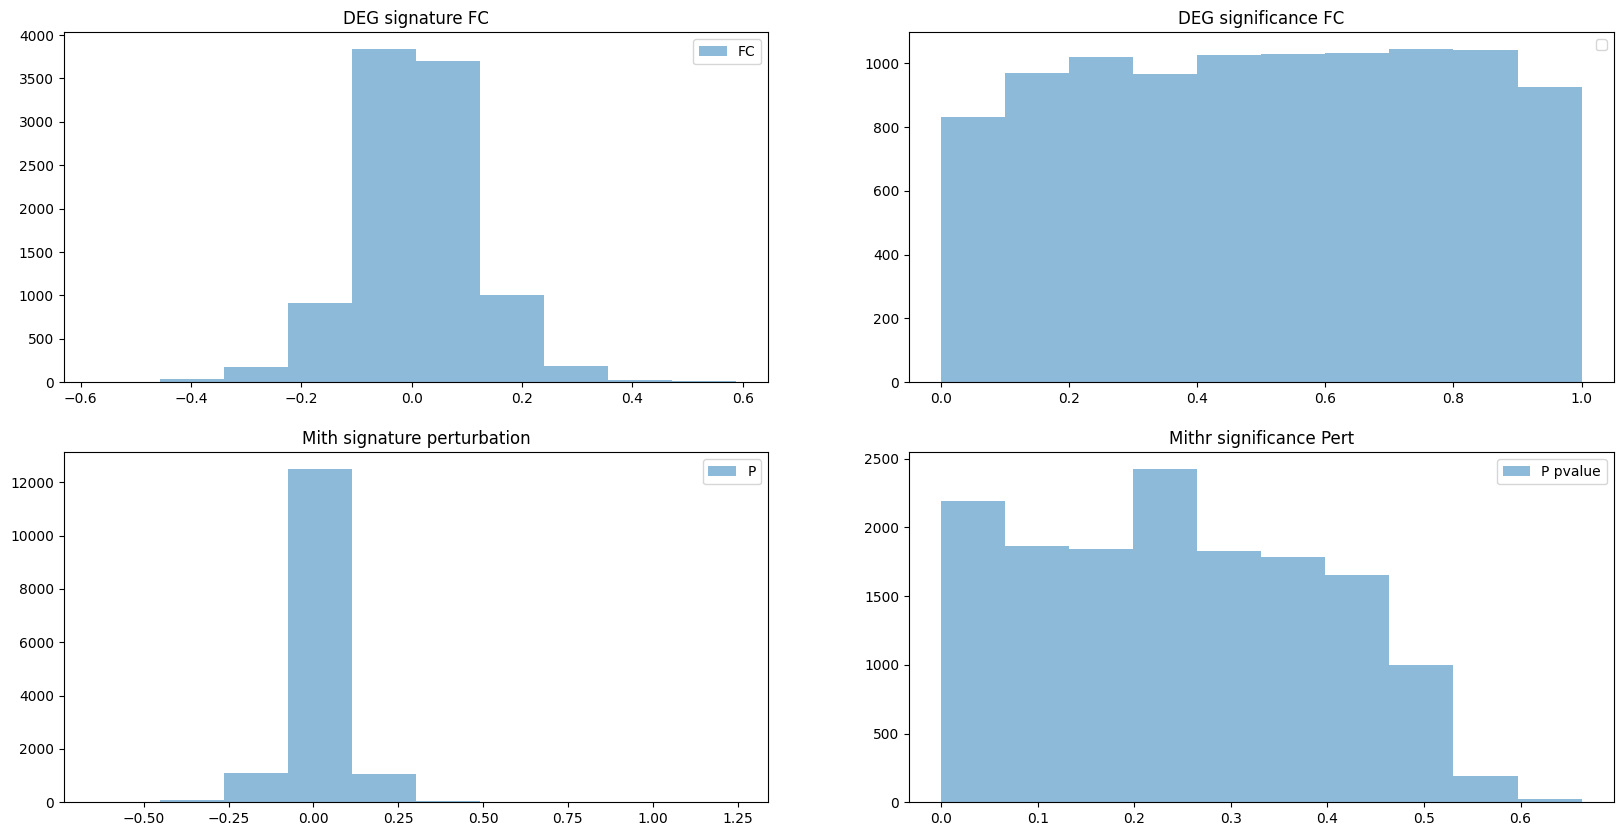

In [104]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(ex_drug_DEG_signature['DE_log2_FC_6h'], label='FC', alpha=0.5)
ax[1,0].hist(ex_drug_mith_signature['Perturbation_6h'], label='P', alpha=0.5)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(ex_drug_DEG_signature['p.value_6h'], label='FC pvalue', alpha=0.5)
ax[1,1].hist(ex_drug_mith_signature['p.value_6h'], label='P pvalue', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[1,0].legend()
ax[1,1].legend()



on common genes only:


/tmp/ipykernel_14059/700586472.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,1].legend()


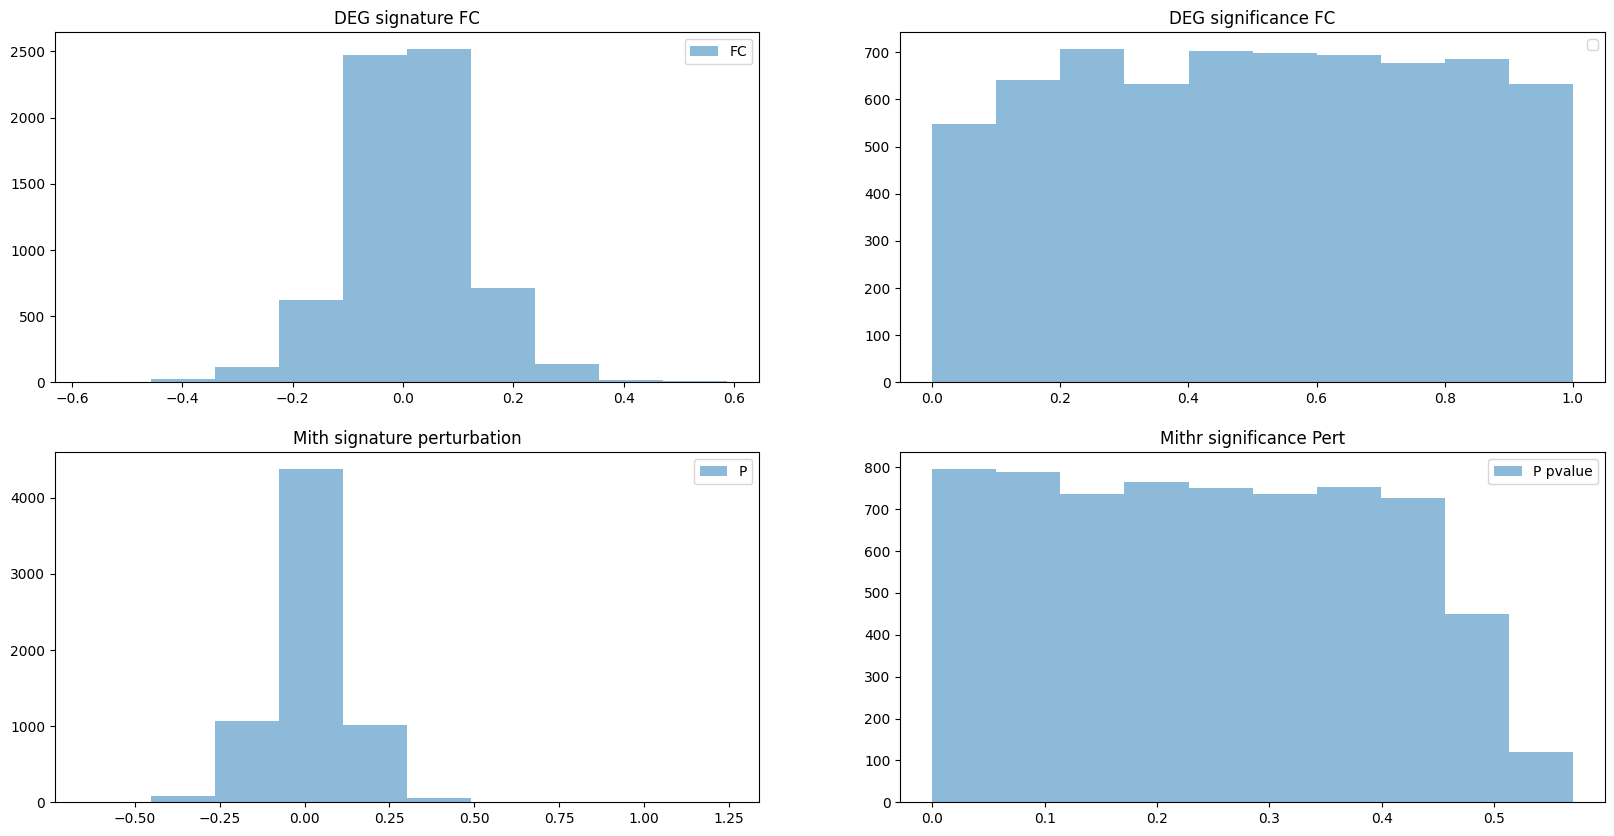

In [106]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))
ax[0,0].hist(ex_drug_DEG_common['DE_log2_FC_6h'], label='FC', alpha=0.5)
ax[1,0].hist(ex_drug_mith_common['Perturbation_6h'], label='P', alpha=0.5)
ax[0,0].set_title('DEG signature FC')
ax[1,0].set_title('Mith signature perturbation')
ax[0,0].legend()
ax[0,1].legend()

ax[0,1].hist(ex_drug_DEG_common['p.value_6h'], label='FC pvalue', alpha=0.5)
ax[1,1].hist(ex_drug_mith_common['p.value_6h'], label='P pvalue', alpha=0.5)
ax[0,1].set_title('DEG significance FC')
ax[1,1].set_title('Mithr significance Pert')
ax[1,0].legend()
ax[1,1].legend()


In [29]:
# kolomogorov smirnov tra i pvalue mith v deg? in questo caso si vede che DEG è abbastanza casuale perché i pvalue sono distribuiti unifioormnemente, e mit
#nmithril, non ostantenon abbia alcuna info sui pvalue, comunque riporta dei pvalue abbastanza brutti
# mithril capisce che i dati in input non sono buoni?
# mihtril come friltraggio?

Pearson cc: PearsonRResult(statistic=np.float64(-0.003789817785234465), pvalue=np.float64(0.7578045000491397)) 
Spearman cc: SignificanceResult(statistic=np.float64(-0.005615042103707931), pvalue=np.float64(0.6477575354231606))


(PearsonRResult(statistic=np.float64(-0.003789817785234465), pvalue=np.float64(0.7578045000491397)),
 SignificanceResult(statistic=np.float64(-0.005615042103707931), pvalue=np.float64(0.6477575354231606)))

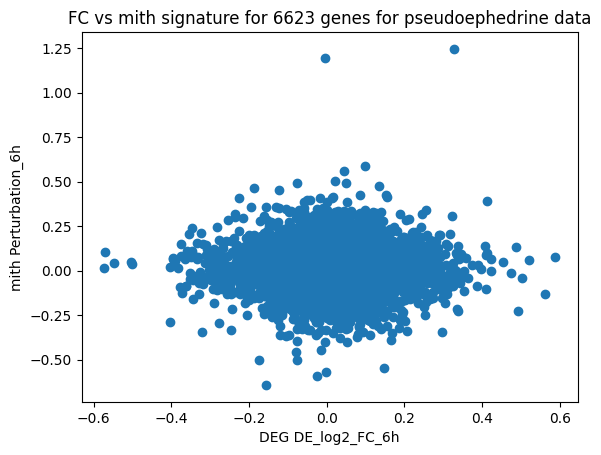

In [107]:
print_correlations(ex_drug_DEG_common,  ex_drug_mith_common,\
                       DEG_col='DE_log2_FC_6h', mith_col='Perturbation_6h',data_name=ex_drug)

In [45]:
ex_drug_mith_signature.columns

Index(['Gene Id', 'Gene Name', 'Perturbation_6h', 'p.value_6h',
       'adj.p.value_6h', 'drug', 't.value_like_statistic_6h',
       'Perturbation_24h', 'p.value_24h', 'adj.p.value_24h',
       't.value_like_statistic_24h', 'Perturbation_6h_24h', 'p.value_6h_24h',
       'adj.p.value_6h_24h', 't.value_like_statistic_6h_24h'],
      dtype='object')

Pearson cc: PearsonRResult(statistic=np.float64(-0.0076175552835904894), pvalue=np.float64(0.5353746786891885)) 
Spearman cc: SignificanceResult(statistic=np.float64(-0.0070539538317160875), pvalue=np.float64(0.5659932738995412))


(PearsonRResult(statistic=np.float64(-0.0076175552835904894), pvalue=np.float64(0.5353746786891885)),
 SignificanceResult(statistic=np.float64(-0.0070539538317160875), pvalue=np.float64(0.5659932738995412)))

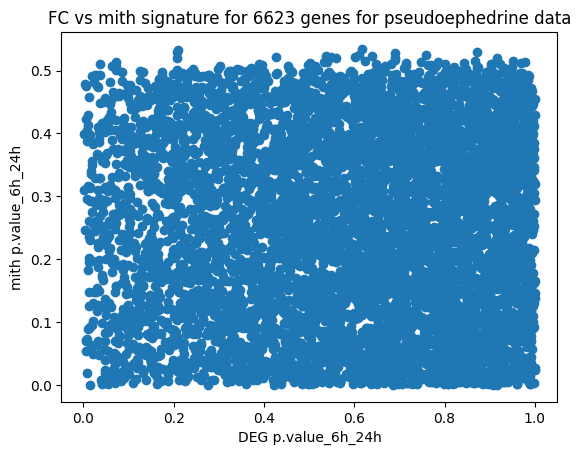

In [108]:
print_correlations(ex_drug_DEG_common,  ex_drug_mith_common,\
                       DEG_col='p.value_6h_24h', mith_col='p.value_6h_24h',data_name=ex_drug)

# <div align="center"><b>Connectivity scores and drug rankings for IPF</b>

## Data exploration and comparison of connectivity score for disease als_NYGC, for all genes, for DEG data, with joined pipeline

In [8]:
DEG_cs_data=pd.read_csv(CS_OUT+'DEG_connectivity_score.tsv', sep='\t')
DEG_cs_data.sort_values(by='connectivity_score')

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
9010,als_NYGC,solifenacin,24h,-1.998742,0.000,-0.163644,1.480435e-51,-0.185760,3.651169e-66,-0.164065
7834,als_NYGC,met-leu-phe,24h,-1.997699,0.000,-0.097788,2.531388e-19,-0.119298,4.914963e-28,-0.098474
1594,als_NYGC,BRD-K35568648,24h,-1.996568,0.001,0.020008,6.655490e-02,0.023617,3.033709e-02,0.019587
5849,als_NYGC,austricine,6h_24h,-1.995918,0.001,-0.117680,2.553610e-27,-0.135991,5.321795e-36,-0.118428
6716,als_NYGC,doramapimod,6h_24h,-1.995781,0.000,-0.060528,2.779992e-08,-0.069470,1.803161e-10,-0.061310
...,...,...,...,...,...,...,...,...,...,...
9377,als_NYGC,tribenoside,6h_24h,1.996468,0.000,-0.098848,1.034278e-19,-0.105657,2.613458e-22,-0.099769
2282,als_NYGC,BRD-K64024097,6h_24h,1.996495,0.001,0.045743,2.714416e-05,0.048697,7.912128e-06,0.046754
4623,als_NYGC,PP-2,6h,1.996900,0.000,-0.184321,3.735147e-65,-0.197642,7.972404e-75,-0.184800
939,als_NYGC,BRD-K06623064,6h,1.996900,0.000,-0.031734,3.610415e-03,-0.039652,2.758627e-04,-0.031896


In [3]:
mith_cs_data=pd.read_csv(CS_OUT+'mith_connectivity_score.tsv', sep='\t')
mith_cs_data.sort_values(by='cs_p_value').head(20)

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
7262,als_NYGC,haloperidol,6h_24h,1.996574,0.000,-0.066426,5.843139e-16,-0.075433,3.824977e-20,-0.069407
1109,als_NYGC,BRD-K13665914,6h_24h,1.996464,0.000,-0.162061,1.031734e-87,-0.166335,2.313454e-92,-0.164939
3269,als_NYGC,CGP-53353,6h_24h,-1.996415,0.000,-0.160542,4.324709e-86,-0.172600,2.075413e-99,-0.163929
3104,als_NYGC,BRD-K98004941,6h_24h,1.995211,0.000,-0.048853,2.703055e-09,-0.056139,8.077457e-12,-0.047038
4036,als_NYGC,L-655240,24h,-1.995251,0.000,-0.083073,4.190014e-24,-0.060902,1.186633e-13,-0.085900
1041,als_NYGC,BRD-K10609180,6h,-1.994459,0.001,0.026905,1.057412e-03,0.056855,4.374480e-12,0.026555
5948,als_NYGC,betamethasone-acetate,6h_24h,-1.995402,0.001,-0.124989,1.205530e-52,-0.114935,9.730993e-45,-0.128643
3544,als_NYGC,FPL-64176,24h,-1.996434,0.001,-0.055141,1.874181e-11,-0.067352,2.293361e-16,-0.056908
3580,als_NYGC,GBR-12783,24h,-1.994862,0.001,-0.063424,1.109255e-14,-0.055928,9.663813e-12,-0.063610
2125,als_NYGC,BRD-K58784778,24h,-1.994066,0.001,-0.121201,1.378588e-49,-0.092956,8.626736e-30,-0.126883


In [4]:
mith_cs_data_24=mith_cs_data[mith_cs_data.perturbation_time=='24h']
mith_cs_data_meta=mith_cs_data[mith_cs_data.perturbation_time=='6h_24h']


In [5]:
# amount of metanalysis drugs with cs <-1.9, pval<0.05
len(mith_cs_data_meta[mith_cs_data_meta['connectivity_score']<-1.95][mith_cs_data_meta['cs_p_value']<0.01])

C:\Users\los4\AppData\Local\Temp\ipykernel_10952\2485138657.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(mith_cs_data_meta[mith_cs_data_meta['connectivity_score']<-1.95][mith_cs_data_meta['cs_p_value']<0.01])


31

In [7]:
mith_cs_data_meta[mith_cs_data_meta['connectivity_score']<-1.95][mith_cs_data_meta['cs_p_value']<0.01].sort_values(by='connectivity_score')

C:\Users\los4\AppData\Local\Temp\ipykernel_12208\782859961.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mith_cs_data_meta[mith_cs_data_meta['connectivity_score']<-1.95][mith_cs_data_meta['cs_p_value']<0.01].sort_values(by='connectivity_score')


,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
3269,als_NYGC,CGP-53353,6h_24h,-1.996415,0.000,-0.160542,4.324709e-86,-0.172600,2.075413e-99,-0.163929
977,als_NYGC,BRD-K07530279,6h_24h,-1.995724,0.003,-0.179420,2.152113e-107,-0.217760,1.756458e-158,-0.182585
5948,als_NYGC,betamethasone-acetate,6h_24h,-1.995402,0.001,-0.124989,1.205530e-52,-0.114935,9.730993e-45,-0.128643
1460,als_NYGC,BRD-K28789065,6h_24h,-1.995349,0.002,-0.143243,9.684236e-69,-0.109777,6.062209e-41,-0.145557
5780,als_NYGC,antimycin-a,6h_24h,-1.995281,0.005,-0.173344,2.894030e-100,-0.154977,2.767803e-80,-0.176270
5063,als_NYGC,SNS-314,6h_24h,-1.995214,0.004,-0.133715,4.655787e-60,-0.116883,3.225341e-46,-0.137370
8228,als_NYGC,olvanil,6h_24h,-1.995146,0.002,-0.162948,1.146775e-88,-0.138281,3.846183e-64,-0.167177
8111,als_NYGC,niguldipine,6h_24h,-1.994997,0.007,-0.110167,3.177561e-41,-0.094219,1.455222e-30,-0.112370
1457,als_NYGC,BRD-K28774715,6h_24h,-1.994923,0.005,0.069101,3.789327e-17,0.067606,1.770520e-16,0.072336
7289,als_NYGC,hexylcaine,6h_24h,-1.994895,0.004,-0.124387,3.746839e-52,-0.102169,1.143783e-35,-0.127379


# Plot cs

(3222, 10)


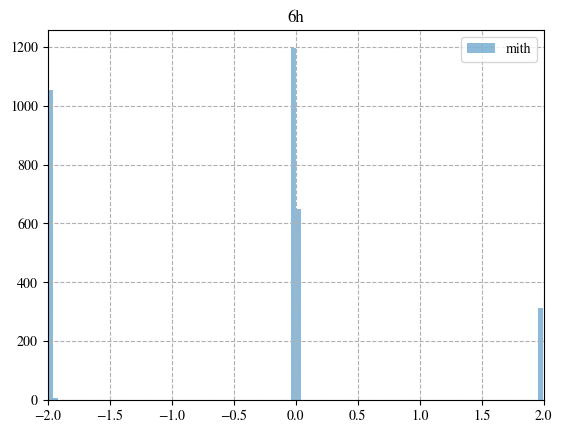

(3222, 10)


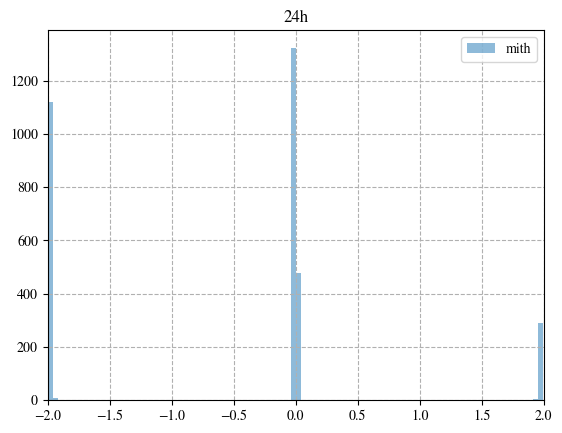

(3222, 10)


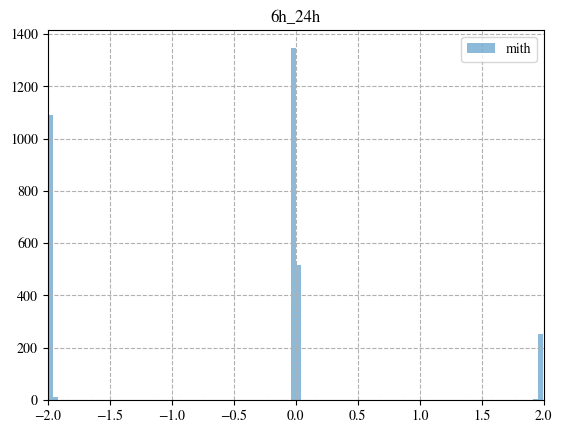

In [44]:
pert_times=['6h','24h','6h_24h'] 
for pert_time in pert_times:
    print( mith_cs_data[mith_cs_data.perturbation_time==pert_time].shape)
    plt.hist(mith_cs_data[mith_cs_data.perturbation_time==pert_time]['connectivity_score'], label='mith', alpha=0.5, bins=100)
    
    plt.grid(linestyle='--')
    plt.xlim(-2,2)
    plt.title(pert_time)
    plt.legend()
    plt.show()

Are there values between [0.5,1.5] and [-1.5,-0.5]?

In [41]:
mith_cs_data['connectivity_score'][((mith_cs_data['connectivity_score']<=1.5) & (mith_cs_data['connectivity_score']>=0.5))\
|((mith_cs_data['connectivity_score']>=-1.5) & (mith_cs_data['connectivity_score']<=-0.5))]

Series([], Name: connectivity_score, dtype: float64)

No, there are not.

# sort by other values

(3222, 10)


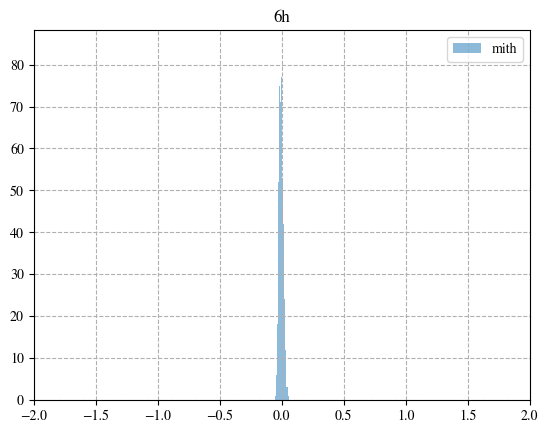

(3222, 10)


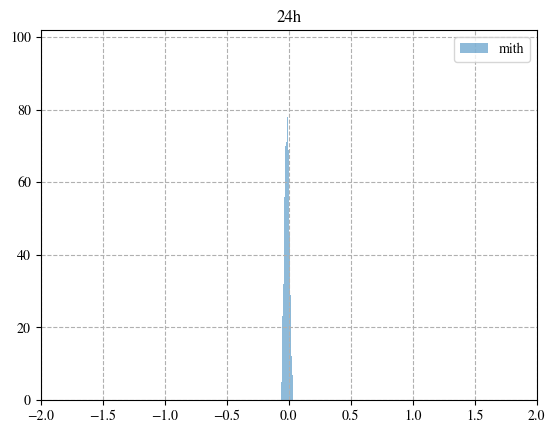

(3222, 10)


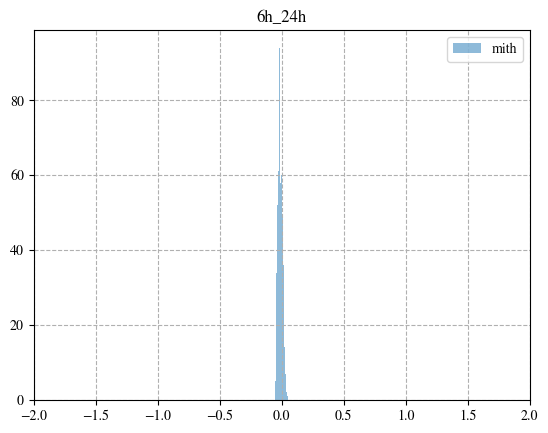

In [47]:
pert_times=['6h','24h','6h_24h'] 
for pert_time in pert_times:
    print( mith_cs_data[mith_cs_data.perturbation_time==pert_time].shape)
    plt.hist(mith_cs_data[mith_cs_data.perturbation_time==pert_time]['pearson'], label='mith', alpha=0.5, bins=100)
    
    plt.grid(linestyle='--')
    plt.xlim(-2,2)
    plt.title(pert_time)
    plt.legend()
    plt.show()

# Only focus on metanalysis
# plot Rankings

# Plot drug rankings of 5 best and worst drugs

In [4]:
mith_cs_data_24=mith_cs_data[mith_cs_data.perturbation_time=='24h']

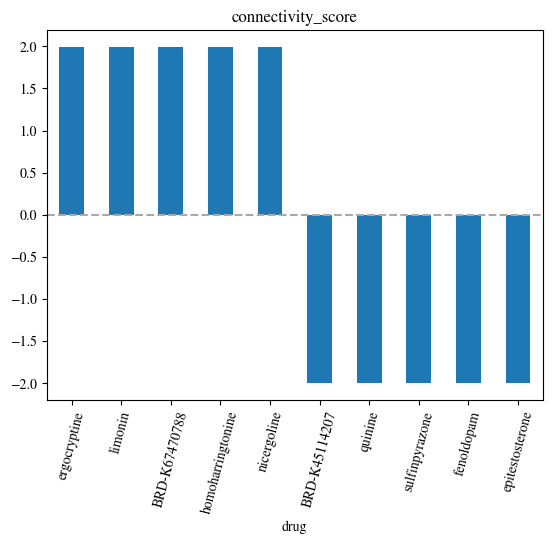

In [30]:
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'connectivity_score')

In [6]:
def print_most_and_least_connected(correlations_dataframe, correlation, n=10):
    '''
    correlations_dataframe is a dataframe with as index the label of interest (=drugs)
    '''

    most_correlated=correlations_dataframe[correlations_dataframe[correlation]>0]
    least_correlated=correlations_dataframe[correlations_dataframe[correlation]<0]
   # print('\n'+correlation+' positive\n',most_correlated[correlation].sort_values(ascending=False).head(n))
    print('\n'+correlation+' negative\n',least_correlated[correlation].sort_values(ascending=True).head(n))
    return most_correlated[correlation].sort_values(ascending=False), least_correlated[correlation].sort_values(ascending=True)
# Sort by c
_, top_drugs=print_most_and_least_connected(mith_cs_data[mith_cs_data.perturbation_time=='6h_24h'].set_index('drug'), 'connectivity_score', n=100)


connectivity_score negative
 drug
CGP-53353               -1.996415
BRD-K07530279           -1.995724
betamethasone-acetate   -1.995402
BRD-K28789065           -1.995349
antimycin-a             -1.995281
                           ...   
benzylpenicillin        -1.991291
dinoprostone            -1.991288
BRD-K88569143           -1.991256
depudecin               -1.991247
morphothebaine          -1.991237
Name: connectivity_score, Length: 100, dtype: float64


In [7]:
for ind, i in top_drugs.items():
    print(ind,'\t', i)

CGP-53353 	 -1.9964148442838896
BRD-K07530279 	 -1.9957238198100813
betamethasone-acetate 	 -1.9954021518723315
BRD-K28789065 	 -1.9953489910868507
antimycin-a 	 -1.9952814782594133
SNS-314 	 -1.9952139654319765
olvanil 	 -1.9951464526045388
niguldipine 	 -1.994997074907708
BRD-K28774715 	 -1.9949229820273464
hexylcaine 	 -1.994894795200591
BRD-K84571636 	 -1.994543355795892
methyllycaconitine 	 -1.994535169308952
AT1-SHH-09 	 -1.9944713243301668
thapsigargin 	 -1.9944038115027296
AGK-2 	 -1.9942871797536563
TW-37 	 -1.9942687858478552
BRD-K54822214 	 -1.994201273020418
desoxycortone 	 -1.994093304532727
BRD-A73847809 	 -1.9940687450719088
phenothiazine 	 -1.994051895323587
gelsemine 	 -1.993841232630872
BRD-K72462751 	 -1.9937625993184007
devazepide 	 -1.9936209126451727
citalopram 	 -1.9936001971436927
BRD-K62459624 	 -1.993526144746046
biotin 	 -1.993515937327184
BRD-K64885524 	 -1.993515937327184
orphenadrine 	 -1.993468879820185
BRD-K13794505 	 -1.9934586319186087
K784-3391 	 -1.9

In [6]:
mith_cs_data[mith_cs_data['drug'].str.startswith('cortison')]

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
6354,ipf,cortisone,6h,-0.001341,0.954,-0.011080,1.775348e-01,-0.046670,1.327050e-08,-0.016779
6355,ipf,cortisone,24h,-1.978362,0.279,-0.040457,8.419297e-07,-0.077654,2.952715e-21,-0.059472
6356,ipf,cortisone,6h_24h,-1.969688,0.452,-0.034546,2.607114e-05,-0.078776,7.881377e-22,-0.051116
6357,ipf,cortisone-acetate,6h,-1.985150,0.109,0.003076,7.081795e-01,-0.002026,8.052161e-01,-0.001169
6358,ipf,cortisone-acetate,24h,-0.018755,0.521,-0.023408,4.385466e-03,-0.037489,5.024057e-06,-0.035455
6359,ipf,cortisone-acetate,6h_24h,-1.981572,0.180,-0.016730,4.174603e-02,-0.036845,7.277589e-06,-0.028849


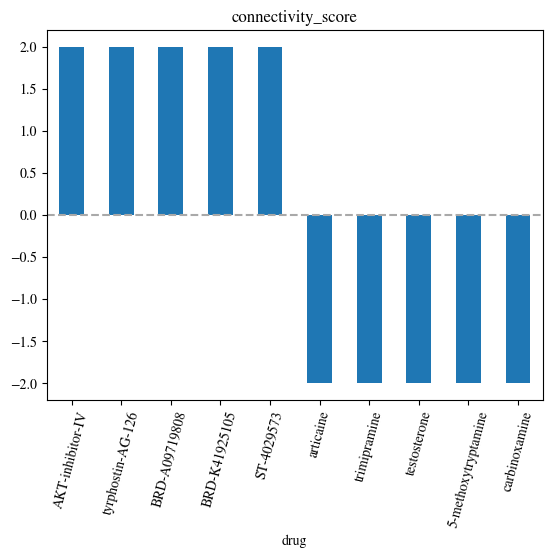

In [55]:
plot_10_most_correlated(mith_cs_data[mith_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score')

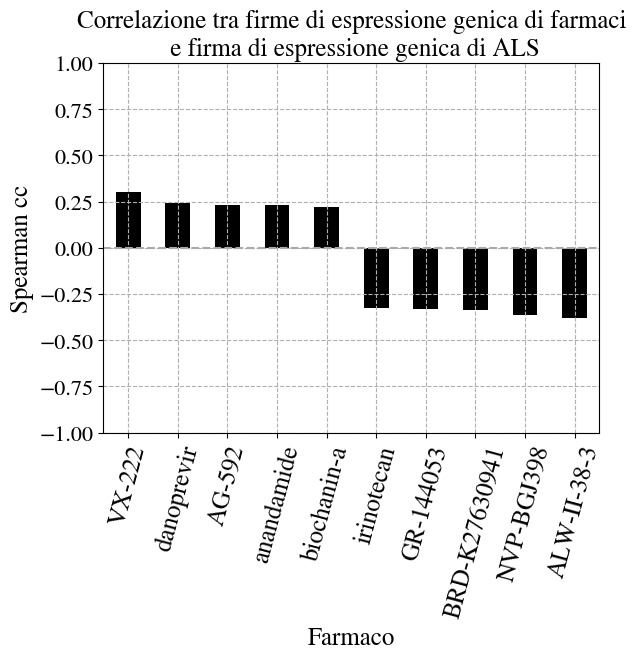

In [107]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

def nice_plot_10_most_correlated(correlations_dataframe, correlation, \
                                 imgname, xlabel, ylabel):
    plt.figure()
    most_and_least_correlated=pd.concat([correlations_dataframe[correlation].sort_values(ascending=False).head(5), correlations_dataframe[correlation].sort_values(ascending=False).tail(5)])
    most_and_least_correlated.plot(kind='bar', color='black')
    plt.xticks(rotation=75, fontsize=18)
    plt.yticks(fontsize=16)
    plt.ylim(-1,1)
    plt.grid(linestyle='--')
    plt.axhline(0, color='darkgrey', linestyle='--')
    plt.title('Correlazione tra firme di espressione genica di farmaci\n e firma di espressione genica di ALS', fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xlabel(xlabel, fontsize=18)
    plt.savefig(IMG_DIR+correlation+'.pdf')
    return
imgname='spearman_cc_esame'
xlabel='Farmaco'
ylabel='Spearman cc'
nice_plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'spearman', imgname, xlabel, ylabel)


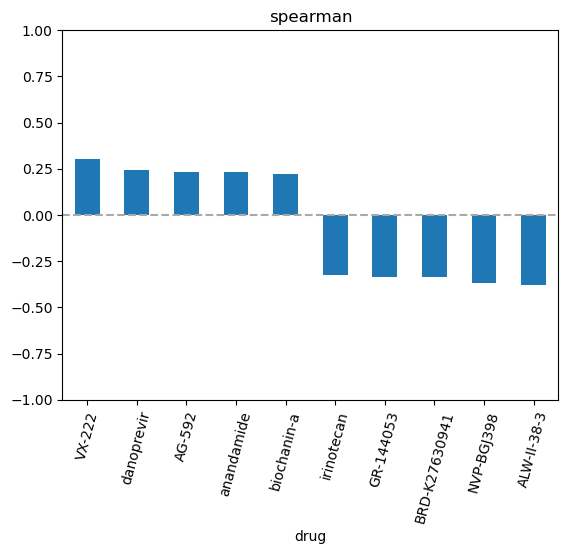

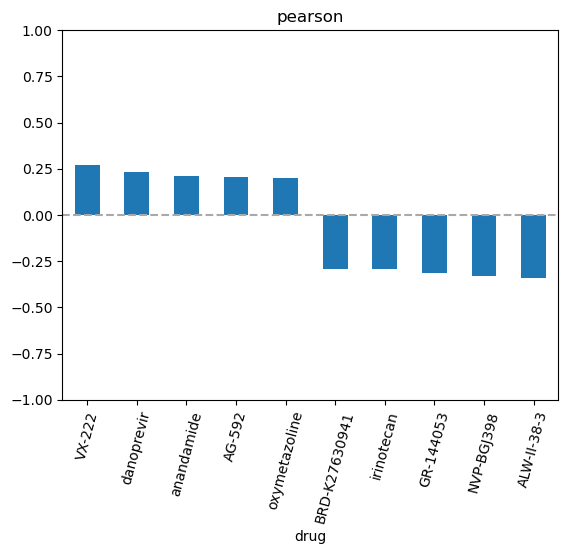

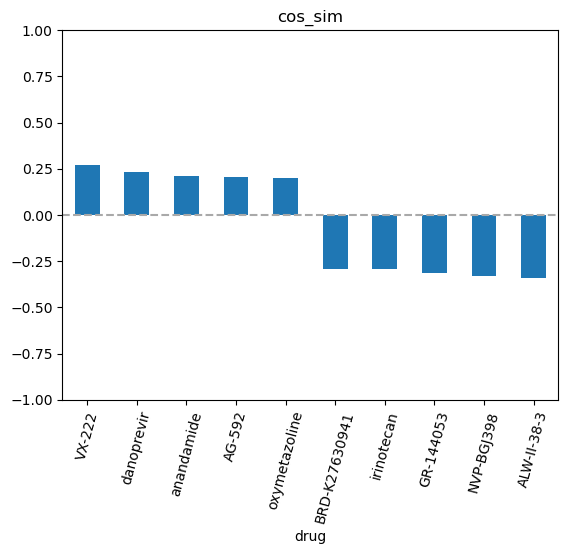

In [77]:
# spearman
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'spearman')
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'pearson')
plot_10_most_correlated(DEG_cs_data_24.set_index('drug'), 'cos_sim')

# mith Plot drug rankings of 5 best and worst drugs

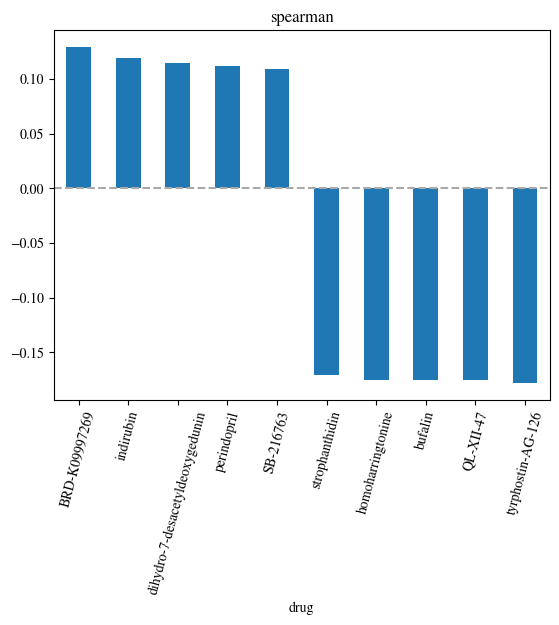

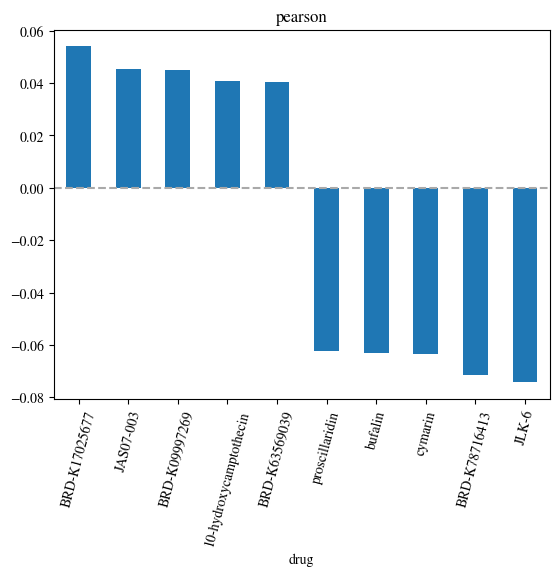

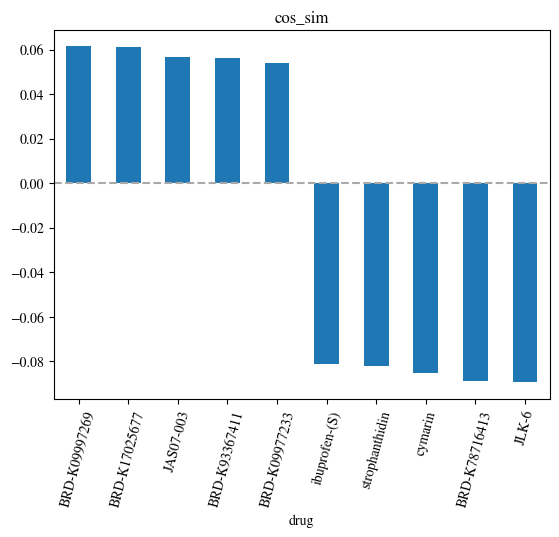

In [31]:
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'spearman')
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'pearson')
plot_10_most_correlated(mith_cs_data_24.set_index('drug'), 'cos_sim')



In [70]:
mith_cs_data.sort_values(by='connectivity_score').head(10)

,disease,drug,perturbation_time,connectivity_score,cs_p_value,pearson,pearson_p_value,spearman,spearman_p_value,cos_sim
3269,als_NYGC,CGP-53353,6h_24h,-1.996397,0.000,-0.160542,4.324709e-86,-0.172600,2.075413e-99,-0.163929
977,als_NYGC,BRD-K07530279,6h_24h,-1.995706,0.004,-0.179420,2.152113e-107,-0.217760,1.756458e-158,-0.182585
5948,als_NYGC,betamethasone-acetate,6h_24h,-1.995385,0.000,-0.124989,1.205530e-52,-0.114935,9.730993e-45,-0.128643
1460,als_NYGC,BRD-K28789065,6h_24h,-1.995331,0.000,-0.143243,9.684236e-69,-0.109777,6.062209e-41,-0.145557
5780,als_NYGC,antimycin-a,6h_24h,-1.995264,0.000,-0.173344,2.894030e-100,-0.154977,2.767803e-80,-0.176270
5063,als_NYGC,SNS-314,6h_24h,-1.995196,0.000,-0.133715,4.655787e-60,-0.116883,3.225341e-46,-0.137370
8228,als_NYGC,olvanil,6h_24h,-1.995129,0.000,-0.162948,1.146775e-88,-0.138281,3.846183e-64,-0.167177
8111,als_NYGC,niguldipine,6h_24h,-1.994980,0.000,-0.110167,3.177561e-41,-0.094219,1.455222e-30,-0.112370
1457,als_NYGC,BRD-K28774715,6h_24h,-1.994905,0.000,0.069101,3.789327e-17,0.067606,1.770520e-16,0.072336
7289,als_NYGC,hexylcaine,6h_24h,-1.994877,0.002,-0.124387,3.746839e-52,-0.102169,1.143783e-35,-0.127379


## SYnonym lists sneza senso di riluzole e edavarone che sono medicine usate in als

In [86]:
list_of_synonyms_of_edaravone=["edaravone",
"89-25-8",
"3-METHYL-1-PHENYL-2-PYRAZOLIN-5-ONE",
"Radicut",
"Norphenazone",
"1-Phenyl-3-methyl-5-pyrazolone",
"Developer Z",
"MCI-186",
"Methylphenylpyrazolone",
"C.I. Developer 1",
"Norantipyrine",
"Phenyl methyl pyrazolone",
"Phenylmethylpyrazolone",
"Radicava",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one",
"3-Methyl-1-phenyl-1H-pyrazol-5(4H)-one",
"1-Phenyl-3-methyl-5-oxo-2-pyrazoline",
"CI Developer 1",
"1-Phenyl-3-methylpyrazolone",
"3H-Pyrazol-3-one, 2,4-dihydro-5-methyl-2-phenyl-",
"1-Phenyl-3-methylpyrazolone-5",
"2-Pyrazolin-5-one, 3-methyl-1-phenyl-",
"3-Methyl-1-phenylpyrazol-5-one",
"5-methyl-2-phenyl-4H-pyrazol-3-one",
"Colorex pmp",
"Jarocol pmp",
"3-Methyl-1-phenyl-2-pyrazoline-5-one",
"NCI-C03952",
"5-Pyrazolone, 3-methyl-1-phenyl-",
"2,4-Dihydro-5-methyl-2-phenyl-3H-pyrazol-3-one",
"Edaravone (MCI-186)",
"NSC-2629",
"CCRIS 512",
"edaravona",
"NSC-26139",
"1-Fenyl-3-methyl-2-pyrazolin-5-on",
"CHEBI:31530",
"HSDB 4102",
"UNII-S798V6YJRP",
"EINECS 201-891-0",
"S798V6YJRP",
"MFCD00003138",
"BRN 0609575",
"DTXSID9021130",
"AI3-03557",
"3-methyl-1-phenyl-4,5-dihydro-1H-pyrazol-5-one",
"MLS000069602",
"3-METHYL-1-PHENYL-2-PYRAZOLIN-5-ONE (MCI-186)",
"DTXCID201130",
"EC 201-891-0",
"1-Phenyl-3-methyl-2-pyrazolin-5-one",
"NCGC00164015-01",
"SMR000059020",
"EDARAVONE (MART.)",
"EDARAVONE [MART.]",
"Edaravone [INN]",
"Monopyrazolone",
"WLN: T5NMV DHJ BR& E1",
"CAS-89-25-8",
"Radicut (TN)",
"PHENAZONE IMPURITY A (EP IMPURITY)",
"PHENAZONE IMPURITY A [EP IMPURITY]",
"3H-Pyrazol-3-one,4-dihydro-5-methyl-2-phenyl-",
"SR-01000000135",
"1-Fenyl-3-methyl-2-pyrazolin-5-on [Czech]",
"edaravonum",
"3-?Methyl-?1-?phenyl-?2-?pyrazolin-?5-?one(Edaravone)",
"MCI186",
"(Edaravone)",
"1 Phenyl 3 methyl 5 pyrazolone",
"Radicava (TN)",
"(MCI-186)",
"Edaravone (Standard)",
"3 Methyl 1 phenyl 2 pyrazolin 5 one",
"RADICAVA ORS",
"CDS1_000986",
"Spectrum_000267",
"Tocris-0786",
"EDARAVONE [JAN]",
"MCI-186; Edaravone",
"Edaravone [USAN:INN]",
"EDARAVONE [HSDB]",
"EDARAVONE [USAN]",
"Maybridge1_005738",
"Opera_ID_1057",
"Spectrum2_001574",
"Spectrum3_000971",
"Spectrum4_001091",
"Spectrum5_001217",
"NORPHENAZONE [MI]",
"M0687",
"EDARAVONE [WHO-DD]",
"N-DESMETHYLANTIPYRINE",
"SCHEMBL4704",
"BSPBio_001235",
"BSPBio_002601",
"KBioGR_000575",
"KBioGR_001502",
"KBioSS_000575",
"KBioSS_000747",
"AE-641/00371017",
"MLS001146878",
"MLS002415675",
"MLS006011753",
"DivK1c_001018",
"DivK1c_002026",
"SPECTRUM1503635",
"SPBio_001508",
"CHEMBL290916",
"1-pheny-3-methyl-5-pyrazolone",
"Edaravone (USAN/JP17/INN)",
"EDARAVONE [ORANGE BOOK]",
"BCBcMAP01_000127",
"GTPL11994",
"HMS503K17",
"HMS557M18",
"HY-B0099R",
"KBio1_001018",
"KBio2_000575",
"KBio2_000747",
"KBio2_003143",
"KBio2_003315",
"KBio2_005711",
"KBio2_005883",
"KBio3_001029",
"KBio3_001030",
"KBio3_001821",
"N07XX14",
"NSC2629",
"NINDS_001018",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one (Edaravone)",
"BCPP000246",
"Bio1_000438",
"Bio1_000927",
"Bio1_001416",
"Bio2_000448",
"Bio2_000928",
"HMS1362M17",
"HMS1792M17",
"HMS1990M17",
"HMS2234M19",
"HMS3266F04",
"HMS3403M17",
"HMS3411L05",
"HMS3654L15",
"HMS3675L05",
"HMS3884A11",
"Pharmakon1600-01503635",
"BCP26336",
"HY-B0099",
"NSC26139",
"Tox21_112077",
"Tox21_201747",
"Tox21_302819",
"BDBM50200541",
"CCG-39352",
"NSC758622",
"s1326",
"STK201315",
"1-Phenyl-3-methyl-2-pyrazolin-5-on",
"AKOS000313817",
"Tox21_112077_1",
"AC-4745",
"BCP9000635",
"CS-1832",
"DB12243",
"NSC-758622",
"SB19128",
"IDI1_001018",
"IDI1_002203",
"NCGC00018218-01",
"NCGC00018218-02",
"NCGC00018218-03",
"NCGC00018218-04",
"NCGC00018218-05",
"NCGC00018218-06",
"NCGC00018218-07",
"NCGC00018218-08",
"NCGC00018218-10",
"NCGC00018218-17",
"NCGC00022665-02",
"NCGC00022665-04",
"NCGC00022665-05",
"NCGC00022665-06",
"NCGC00256515-01",
"NCGC00259296-01",
"SBI-0051836.P002",
"1ST000657",
"DB-002517",
"NS00002708",
"SW148216-2",
"5-methyl-2-phenyl-2,4-dihydro-3-pyrazolone",
"EN300-16234",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, 99%",
"3-METHYL-1-PHENYL-2H-PYRAZOLIN-5-ONE",
"4E-901",
"5-methyl-2-phenyl-2,4-dihydro-pyrazol-3-one",
"D01552",
"D86209",
"1-PHENYL-3-METHYL-DELTA3-PYRAZOL-5-ONE",
"3-?Methyl-?1-?phenyl-?2-?pyrazolin-?5-?one",
"3-PYRAZOLIN-5-ONE, 3-METHYL-1-PHENYL-",
"AB00375776_14",
"AB00375776_15",
"2 4-Dihydro-5-methyl-2-phenyl-3H-pyrazol-3-one",
"2,4-dihydro-2-phenyl-5-methyl-3H-pyrazol-3-one",
"Q335099",
"SR-01000000135-2",
"SR-01000000135-3",
"SR-01000000135-5",
"5-Methyl-2-phenyl-2,4-dihydro-3H-pyrazol-3-one #",
"BRD-K35458079-001-04-2",
"BRD-K35458079-001-12-5",
"BRD-K35458079-001-23-2",
"BRD-K35458079-001-27-3",
"BRD-K35458079-001-28-1",
"BRD-K35458079-001-29-9",
"BRD-K35458079-001-31-5",
"BRD-K35458079-001-33-1",
"Z50145861",
"F0391-0021",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, SAJ special grade",
"3-Methyl-1-phenyl-2-pyrazoline-5-one, purum, >=98.0% (NT)",
"Phenazone impurity A, European Pharmacopoeia (EP) Reference Standard",
"InChI=1/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-2-4-6-9/h2-6H,7H2,1H"]
list_of_synonyms_of_riluzole=["riluzole",
"1744-22-5",
"Rilutek",
"2-Amino-6-(trifluoromethoxy)benzothiazole",
"6-(trifluoromethoxy)benzo[d]thiazol-2-amine",
"6-(trifluoromethoxy)-1,3-benzothiazol-2-amine",
"Riluzol",
"RP-54274",
"Riluzolum",
"2-amino-6-trifluoromethoxybenzothiazole",
"2-Benzothiazolamine, 6-(trifluoromethoxy)-",
"2-amino-6-(trifluoromethoxy)benzo[d]thiazole",
"Tiglutik",
"C8H5F3N2OS",
"PK-26124",
"RP 54274",
"Riluzol [INN-Spanish]",
"Riluzolum [INN-Latin]",
"2-Benzothiazolamine,6-(trifluoromethoxy)-",
"Amino-2 trifluoromethoxy-6 benzothiazole",
"UNII-7LJ087RS6F",
"NSC-753433",
"NSC-759823",
"EXSERVAN",
"7LJ087RS6F",
"MLS000069369",
"6-(trifluoromethoxy)-2-benzothiazolamine",
"6-Trifluoromethoxy-benzothiazol-2-ylamine",
"2-Amino-6-(trifluoromethoxy)-benzothiazole",
"BHV-0223",
"CHEMBL744",
"BENZOTHIAZOLE, 2-AMINO-6-TRIFLUOROMETHOXY-",
"SMR000058231",
"CHEBI:8863",
"DTXSID3045192",
"Riluzole [USAN:USP:INN:BAN]",
"Tiglutik (thickened oral suspension)",
"MFCD00210213",
"NSC 753433",
"NSC 759823",
"NCGC00015882-09",
"Riluzol (INN-Spanish)",
"Riluzolum (INN-Latin)",
"RILUZOLE (MART.)",
"RILUZOLE [MART.]",
"RILUZOLE (USP-RS)",
"RILUZOLE [USP-RS]",
"RILUZOLE (USP IMPURITY)",
"RILUZOLE [USP IMPURITY]",
"DTXCID1025192",
"RILUZOLE (USP MONOGRAPH)",
"RILUZOLE [USP MONOGRAPH]",
"Riluzole (USAN:USP:INN:BAN)",
"Rilutek (TN)",
"CAS-1744-22-5",
"Amino-2 trifluoromethoxy-6 benzothiazole [French]",
"Riluzole, solid",
"Riluzole?",
"BF-37",
"2-amino-6-(trifluoromethoxy)-1,3-benzothiazole",
"ALBB-006046",
"Riluzole (Rilutek)",
"Prestwick-03A08",
"Riluzole (Standard)",
"2 Amino 6 trifluoromethoxybenzothiazole",
"PK26124",
"TIGLUTIK KIT",
"Tocris-0768",
"Opera_ID_548",
"RILUZOLE [USAN]",
"Lopac-R-116",
"RILUZOLE [INN]",
"RILUZOLE [JAN]",
"RILUZOLE [MI]",
"Prestwick0_000167",
"Prestwick1_000167",
"Prestwick2_000167",
"Prestwick3_000167",
"Spectrum2_000550",
"Biomol-NT_000245",
"RILUZOLE [WHO-DD]",
"cid_5070",
"Riluzole (JAN/USP/INN)",
"RILUZOLE [EMA EPAR]",
"Lopac0_001064",
"SCHEMBL78905",
"BSPBio_000033",
"BIDD:GT0055",
"SPBio_000599",
"SPBio_001954",
"RILUZOLE [ORANGE BOOK]",
"BPBio1_000037",
"BPBio1_000837",
"GTPL2326",
"BDBM30705",
"HY-B0211R",
"N07XX02",
"Bio1_000416",
"Bio1_000905",
"Bio1_001394",
"HMS1773G08",
"HMS2089O19",
"HMS2094G07",
"HMS2233E14",
"HMS3263E10",
"HMS3371A09",
"HMS3657E13",
"Pharmakon1600-01505348",
"BCP02142",
"HY-B0211",
"Riluzole - CAS 1744-22-5",
"Tox21_110252",
"Tox21_501064",
"AC-730",
"BBL013272",
"CCG-39528",
"HB6093",
"NSC753433",
"NSC759823",
"s1614",
"STK503686",
"AKOS000265071",
"Tox21_110252_1",
"DB00740",
"KS-5231",
"LP01064",
"SDCCGSBI-0051034.P003",
"2-amino-6-trifluoromethoxy-benzothiazole",
"6-(trifluoromethoxy)benzothiazol-2-amine",
"6-trifluoromethoxy-2-amino-benzothiazole",
"NCGC00015882-01",
"NCGC00015882-02",
"NCGC00015882-03",
"NCGC00015882-04",
"NCGC00015882-05",
"NCGC00015882-06",
"NCGC00015882-07",
"NCGC00015882-08",
"NCGC00015882-10",
"NCGC00015882-11",
"NCGC00015882-12",
"NCGC00015882-13",
"NCGC00015882-15",
"NCGC00015882-28",
"NCGC00023141-02",
"NCGC00023141-04",
"NCGC00023141-05",
"NCGC00023141-06",
"NCGC00261749-01",
"6-(trifluoromethoxy)-2-aminobenzothiazole",
"6-trifluoromethoxybenzo[d]thiazol-2-amine",
"BR164340",
"SBI-0051034.P002",
"2-Amino-6-(Trifluoromethoxy) Benzothiazole",
"6-(Trifluoromethoxy)-2-amino-benzothiazole",
"DB-030335",
"A2423",
"EU-0101064",
"NS00005892",
"R1174",
"SW196805-4",
"EN300-23782",
"6-trifluoromethoxy-1,3-benzothiazol-2-ylamine",
"A13951",
"C07937",
"D00775",
"VU0239571-11",
"Q415744",
"SR-01000002997-3",
"BRD-K21283037-001-02-5",
"BRD-K21283037-001-20-7",
"BRD-K21283037-001-21-5",
"BRD-K21283037-003-03-9",
"BRD-K21283037-003-06-2",
"BRD-K21283037-003-11-2",
"F3282-0020",
"Z164707762",
"Riluzole, 6-(Trifluoromethoxy)-1,3-benzothiazol-2-amine",
"Riluzole, United States Pharmacopeia (USP) Reference Standard",
"2-Amino-6-(trifluoromethoxy)-1,3-benzothiazole;2-AMINO-6-(TRIFLUOROMETHOXY)BENZOTHIAZOLE",
"6-Trifluoromethoxy-2-aminobenzothiazole; 6-(Trifluoromethoxy)-1,3-benzothiazol-2-amine"]

# asd

In [87]:
for x in list_of_synonyms_of_riluzole:
    if x in  mith_cs_data.drug:
        print(x)

non c'è

# Drugs ranking by similarity measures significance

In [141]:
def print_10_most_and_least_significantly_corelated(correlations_dataframe, correlation, p_val_correlation, n=10):
    '''
    correlations_dataframe is a dataframe with as index the label of interest (=drugs)
    '''

    #still full data
    most_correlated=correlations_dataframe[correlations_dataframe[correlation]>0]
    least_correlated=correlations_dataframe[correlations_dataframe[correlation]<0]


    print('\n'+correlation+' positive\n',most_correlated[p_val_correlation].sort_values(ascending=True).head(n))
    print('\n'+correlation+' negative\n',least_correlated[p_val_correlation].sort_values(ascending=True).head(n))
    return

In [55]:
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'spearman', 'spearman_p_value', 20)
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'pearson','pearson_p_value', 20)



spearman positive
 drug
TG-100115             3.591346e-223
ZM-39923              3.773550e-175
probenecid            1.010802e-174
rhapontin             4.475021e-147
SA-3676               1.094402e-142
PT-630                5.079169e-142
hydrocotarnine        4.684960e-134
PT-630                3.588227e-128
oxymetazoline         6.922203e-128
BAY-K-8644-(S)-(-)    4.125719e-126
triacsin-c            4.254452e-122
triacsin-c            4.254452e-122
BRD-K33164466         1.873198e-120
iloperidone           2.656246e-119
MDL-73005EF           1.876366e-113
etacrynic-acid        4.881913e-112
fursultiamine         2.917551e-111
safrolglycol          5.694766e-111
VX-222                5.737752e-111
gabazine              5.042778e-109
Name: spearman_p_value, dtype: float64

spearman negative
 drug
NVP-BGJ398           2.634603e-271
ALW-II-38-3          5.801126e-261
erythrosine          4.930657e-231
erythrosine          3.326570e-230
brivanib             3.331662e-223
DMAB-anabaseine 

In [56]:
print_10_most_and_least_significantly_corelated(mith_cs_data.set_index('drug'), 'connectivity_score', 'cs_p_value')



connectivity_score positive
 drug
BRD-K98004941    0.000
haloperidol      0.000
BRD-K13665914    0.000
BRD-K78716413    0.001
MBCQ             0.001
imiquimod        0.001
naphazoline      0.002
BRD-K72676786    0.002
losartan         0.002
catechin         0.002
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
CGP-53353                0.000
L-655240                 0.000
BRD-K33392208            0.001
BRD-K10609180            0.001
betamethasone-acetate    0.001
FPL-64176                0.001
BRD-K58784778            0.001
thapsigargin             0.001
GBR-12783                0.001
trapidil                 0.002
Name: cs_p_value, dtype: float64


In [64]:
print_10_most_and_least_significantly_corelated(mith_cs_data[mith_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score', 'cs_p_value', 10)

print_10_most_and_least_significantly_corelated(mith_cs_data_24.set_index('drug'), 'connectivity_score', 'cs_p_value', 10)

print_10_most_and_least_significantly_corelated(mith_cs_data[mith_cs_data.perturbation_time=='6h_24h'].set_index('drug'), 'connectivity_score', 'cs_p_value', 10)



connectivity_score positive
 drug
MBCQ                         0.001
imiquimod                    0.001
phorbol-myristate-acetate    0.002
BRD-K72676786                0.002
naphazoline                  0.002
prostaglandin-a1             0.003
BRD-K60571253                0.003
BRD-K64970062                0.004
BRD-K83194053                0.004
BRD-K39522184                0.004
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
BRD-K10609180       0.001
7-hydroxy-PIPAT     0.002
bisbenzimide        0.002
APHA-compound-8     0.002
BRD-K61359235       0.003
quetiapine          0.003
BRD-A73847809       0.003
dibenzoylmethane    0.003
KI-8751             0.003
plinabulin          0.004
Name: cs_p_value, dtype: float64

connectivity_score positive
 drug
BRD-K78716413      0.001
catechin           0.002
ABT-751            0.003
VUF-5681           0.003
fenobam            0.005
BMS-191011         0.005
endecaphyllin-x    0.006
doramapimod        0.006
CMPD-1             

# DEG

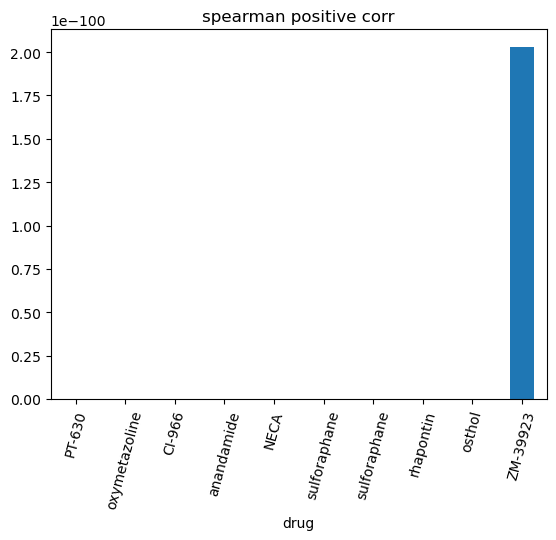

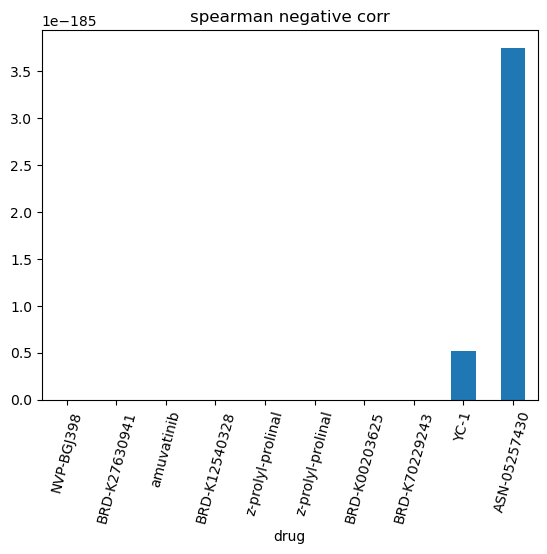

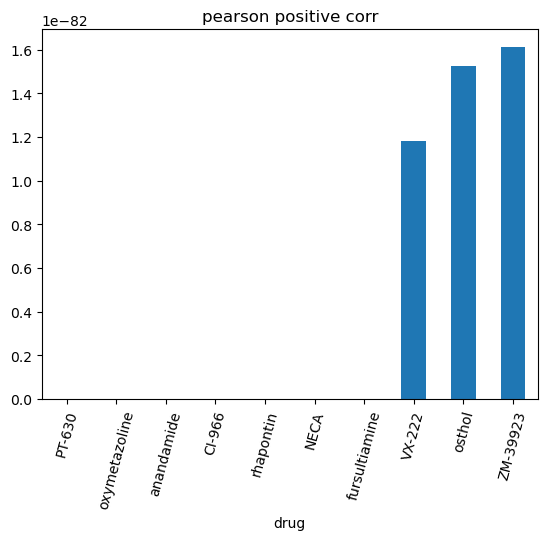

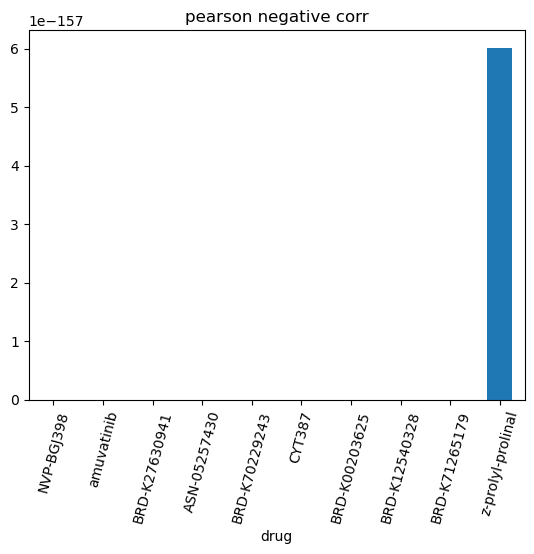

In [59]:
plot_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'spearman', 'spearman_p_value')
plot_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'pearson','pearson_p_value')


In [61]:
# for Cscore
print_10_most_and_least_significantly_corelated(DEG_cs_data.set_index('drug'), 'connectivity_score','cs_p_value', 20)


connectivity_score positive
 drug
BRD-K07790824    0.000
UNC-0321         0.000
ticlopidine      0.000
BRD-K06623064    0.000
ticlopidine      0.000
ZM-323881        0.000
tribenoside      0.000
dasatinib        0.000
cirazoline       0.000
PP-2             0.000
PCI-24781        0.001
tribenoside      0.001
BRD-K64024097    0.001
pirlindole       0.001
BRD-K10057859    0.002
neratinib        0.002
AZD-1480         0.002
SJB-shh-31       0.002
BRD-K64024097    0.002
BRD-K52831896    0.002
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
doramapimod       0.000
flutamide         0.000
met-leu-phe       0.000
solifenacin       0.000
ICI-204448        0.000
hydrastinine      0.000
BRD-K35568648     0.001
dephostatin       0.001
nateglinide       0.001
austricine        0.001
irilin-a          0.002
BRD-K28366444     0.002
cytochalasin-d    0.002
BRD-K55896799     0.003
paroxetine        0.003
reserpic-acid     0.003
L-670596          0.003
AC-55649          0.003
NCH-5

In [62]:
print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='6h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)

print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='24h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)

print_10_most_and_least_significantly_corelated(DEG_cs_data[DEG_cs_data.perturbation_time=='6h_24h'].set_index('drug'), 'connectivity_score','cs_p_value', 20)


connectivity_score positive
 drug
BRD-K07790824    0.000
ticlopidine      0.000
ticlopidine      0.000
ZM-323881        0.000
PP-2             0.000
BRD-K06623064    0.000
pirlindole       0.001
PCI-24781        0.001
SJB-shh-31       0.002
neratinib        0.002
BRD-K10057859    0.002
BRD-K52831896    0.002
AZD-7762         0.004
BRD-K29345712    0.004
BRD-K51557114    0.004
foretinib        0.005
fenbendazole     0.006
clopidogrel      0.006
AMG-9810         0.006
isoxicam         0.006
Name: cs_p_value, dtype: float64

connectivity_score negative
 drug
cytochalasin-d    0.002
TUL-XIX029        0.005
BRD-K08307026     0.007
risperidone       0.008
BRL-52537         0.010
O-2050            0.011
vesamicol         0.015
NBI-27914         0.016
mebeverine        0.017
BRD-K16057611     0.017
cardiogenol-c     0.018
vesamicol         0.019
fexaramine        0.019
BRD-K32862555     0.020
BRD-A24054354     0.020
TW-37             0.021
BRD-K33676730     0.023
BNTX              0.024
neuro

# Correlation tra mith e DEG cs?
sempre usando solo 6h 24hDEG_cs_data

In [14]:
stats.pearsonr(DEG_cs_data.sort_values(by='drug')['connectivity_score'], mith_cs_data.sort_values(by='drug')['connectivity_score'])

PearsonRResult(statistic=0.017773745044366105, pvalue=0.07165439854252896)

In [15]:
stats.spearmanr(DEG_cs_data.sort_values(by='drug')['connectivity_score'], mith_cs_data.sort_values(by='drug')['connectivity_score'])

SignificanceResult(statistic=0.013842960848149063, pvalue=0.16064884514981276)

# Random sampling of REG distribution:

In [ ]:
from scipy.stats import ks_2samp

In [45]:
from connectivity_score import montecarlo_connectivity, calculate_RGES

r=9892#1000#14812#

# Length of disease up regulated signature:
# set to sup=int(r/2) to sample drug spectrum
s_up=int(r/2)#10#7884#4455

# Length of disease up regulated signature:
# set to sup=int(r/2) to sample drug spectrum
s_down=int(r/2)#10#6928#3954

# Number of random iterations:
n_iterations=3222

random_RGES_dist=np.round(montecarlo_connectivity(s_up, s_down, r, n_iterations), 3)

# fatto da  coso


# Compare random sampling distribution of RGES with DEG based RGED and mith based RGS

In [51]:
print(ks_2samp(random_RGES_dist, DEG_cs_data.sort_values(by='drug')['connectivity_score']))
print(ks_2samp(random_RGES_dist, mith_cs_data.sort_values(by='drug')['connectivity_score']))

KstestResult(statistic=0.04341048254697555, pvalue=0.00018706468662395422, statistic_location=1.9739942628150853, statistic_sign=-1)
KstestResult(statistic=0.19199795361330108, pvalue=1.1300879108478887e-79, statistic_location=-1.975008554877665, statistic_sign=-1)


In [55]:
print(ks_2samp(random_RGES_dist, DEG_cs_data_mg.sort_values(by='drug')['connectivity_score']))
print(ks_2samp(random_RGES_dist, mith_cs_data_mg.sort_values(by='drug')['connectivity_score']))

KstestResult(statistic=0.12462634794043803, pvalue=1.2219168466234415e-33, statistic_location=1.964999598948104, statistic_sign=-1)
KstestResult(statistic=0.12009102259542465, pvalue=2.930188648202195e-31, statistic_location=-1.9700268549300173, statistic_sign=-1)


# Compara DEG connectivity score scon DEG connectivity scores di catalano